In [20]:
method_list = ['PASTE','PASTE_p0','PASTE2','STAligner_best','SLAT','STalign','CAST','STAIR','SPACEL','Spateo_rigid','Spateo_nonrigid','SANTO','GPSA']
selected_colors=['#FC8002','#ADDB88','#ED8585','#B9181A','#92C2DD','#369F2D','#F6D0CE','#4995C6','#1663A9','#B4B4D5','#8481BA','#614099','#FABB6E']
color_dict = {method: selected_colors[i] for i, method in enumerate(method_list)}

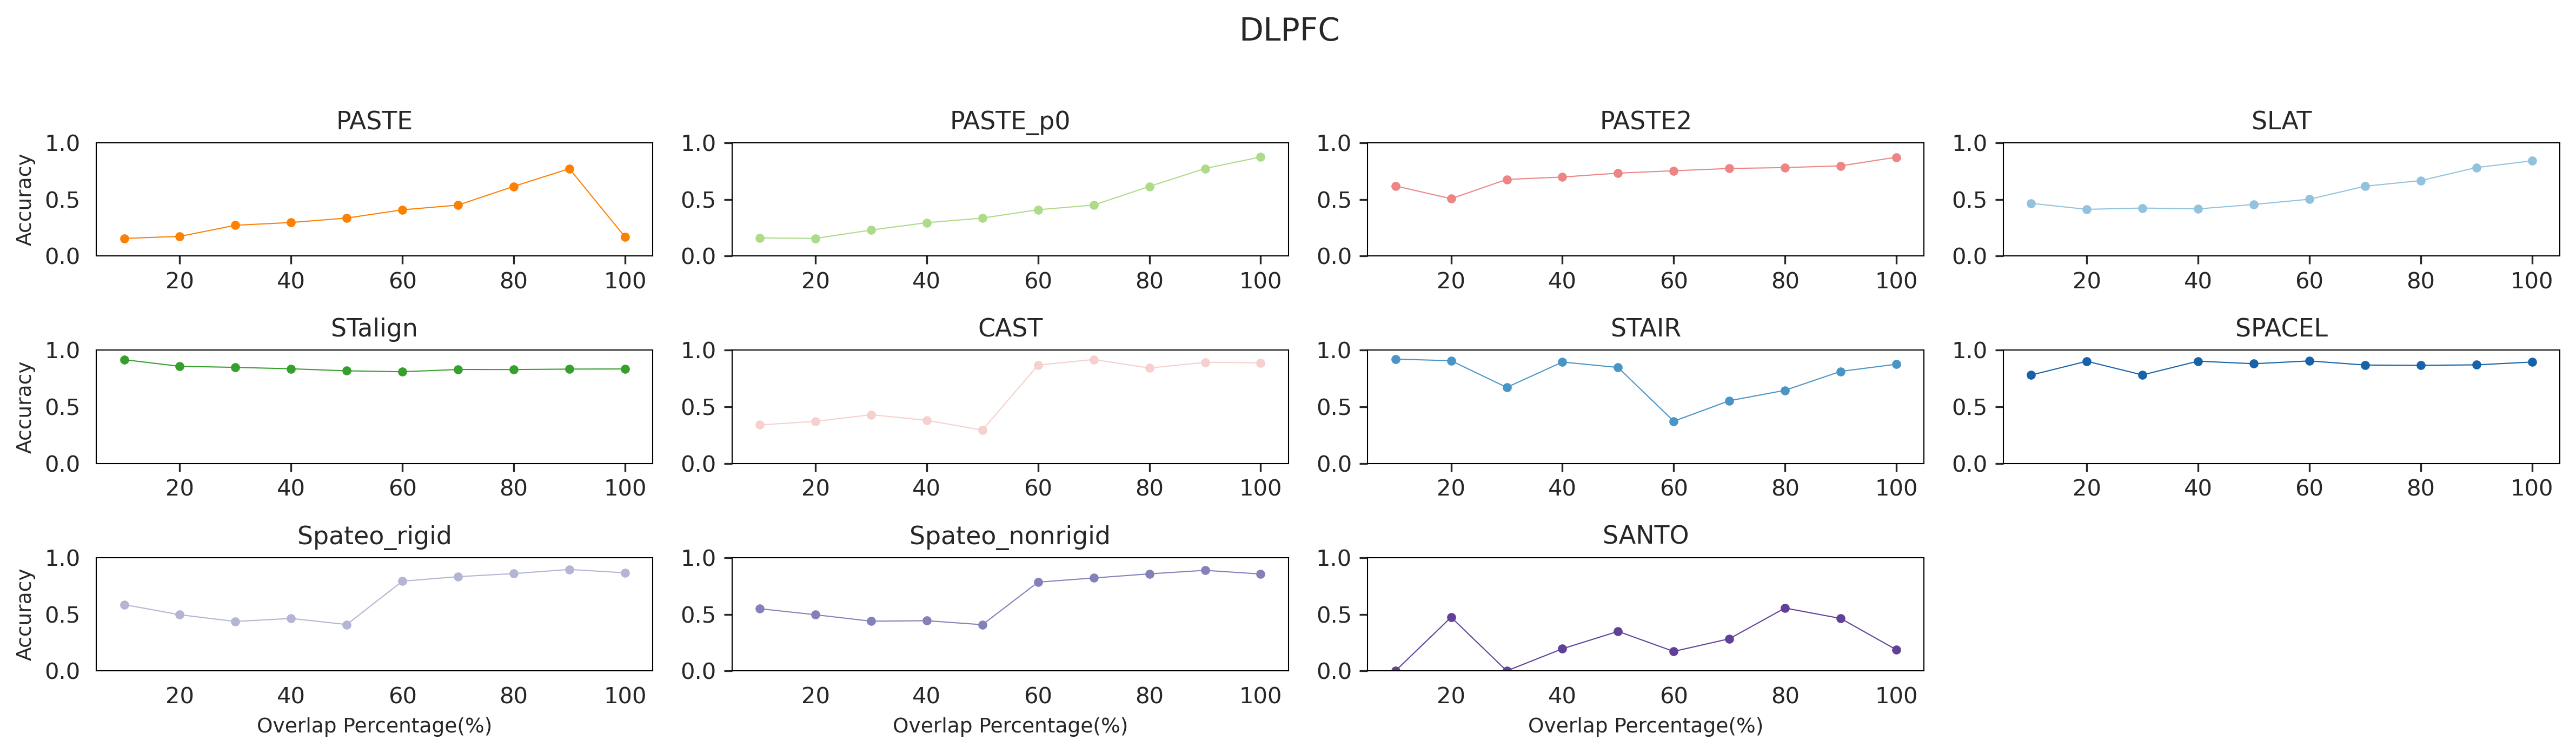

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/SABench/Robustness/DLPFC/DLPFC_crop.csv')
x_values = [i for i in range(10, 101, 10)]
filtered_columns = [col for col in df.columns if col != "STAligner_best"]

n_cols = 4
n_rows = (len(filtered_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 1.5*n_rows), dpi=300)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.flatten()

for i, column in enumerate(filtered_columns):
    ax = axes[i]
    y_values = df[column].values
    line_color = color_dict.get(column, (0.5, 0.5, 0.5))
    
    row = i // n_cols
    col = i % n_cols
    
    ax.plot(x_values, y_values, color=line_color, marker='o', markersize=3, linewidth=0.5)
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(0.5)

    ax.set_ylim(0, 1)
    ax.set_xlim(5, 105)
    ax.set_yticks([0, 0.5, 1])  
    ax.set_title(column, fontsize=11)
    
    if row != n_rows-1:
        ax.set_xlabel('')
        ax.tick_params(axis='x', which='both', bottom=True) 
    else:
        ax.set_xlabel('Overlap Percentage(%)', fontsize=9)
    
    if col == 0:
        ax.set_ylabel('Accuracy', fontsize=9)
    else:
        ax.set_ylabel('')
        ax.tick_params(axis='y', which='both', left=True)  
    ax.grid(False)

for j in range(len(filtered_columns), len(axes)):
    axes[j].axis('off')

plt.suptitle('DLPFC', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

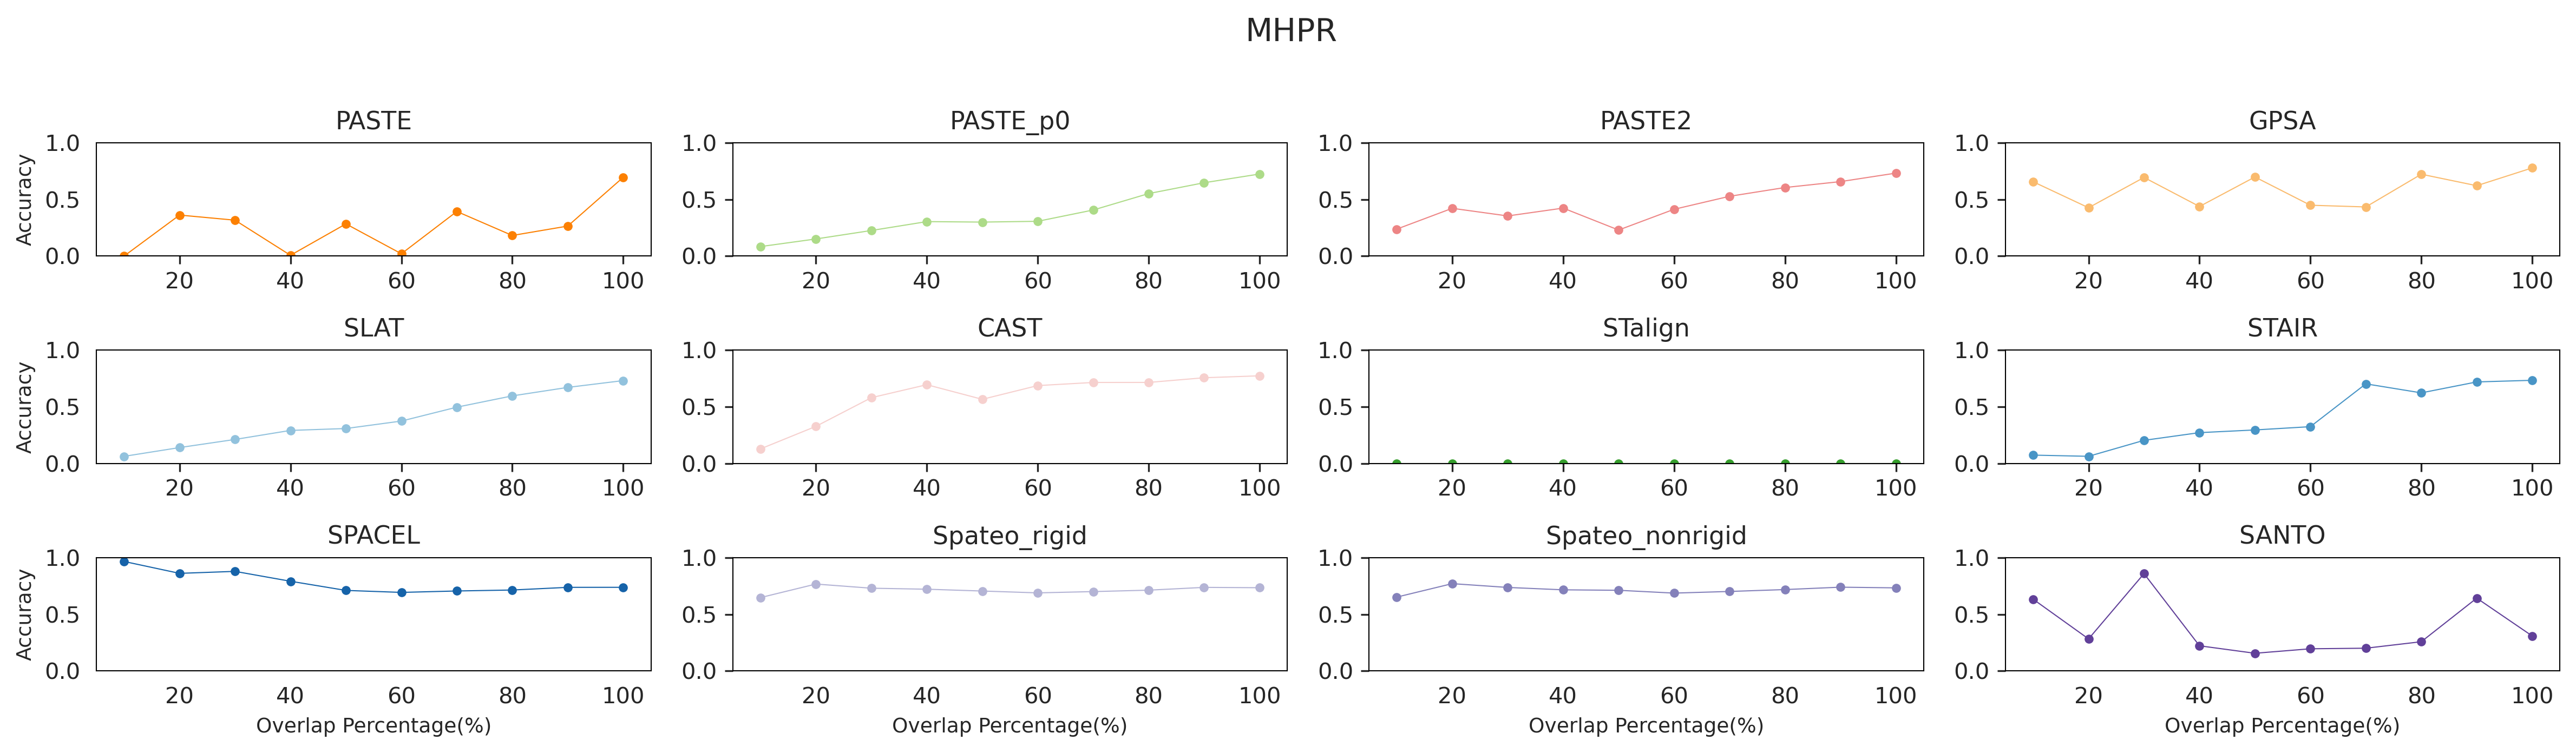

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/SABench/Robustness/MHPR/MHPR_crop.csv')
x_values = [i for i in range(10, 101, 10)]
filtered_columns = [col for col in df.columns if col != "STAligner_best"]

n_cols = 4
n_rows = (len(filtered_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 1.5*n_rows), dpi=300)
plt.subplots_adjust(wspace=0.8, hspace=0.4) 
axes = axes.flatten()

for i, column in enumerate(filtered_columns):
    ax = axes[i]
    y_values = df[column].values
    line_color = color_dict.get(column, (0.5, 0.5, 0.5))
    
    row = i // n_cols
    col = i % n_cols
    
    ax.plot(x_values, y_values, color=line_color, marker='o', markersize=3, linewidth=0.5)
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(0.5)

    ax.set_ylim(0, 1)
    ax.set_xlim(5, 105)
    ax.set_yticks([0, 0.5, 1]) 
    ax.set_title(column, fontsize=11)
    
    if row != n_rows-1:
        ax.set_xlabel('')
        ax.tick_params(axis='x', which='both', bottom=True) 
    else:
        ax.set_xlabel('Overlap Percentage(%)', fontsize=9)
    
    if col == 0:
        ax.set_ylabel('Accuracy', fontsize=9)
    else:
        ax.set_ylabel('')
        ax.tick_params(axis='y', which='both', left=True)  
    ax.grid(False)

for j in range(len(filtered_columns), len(axes)):
    axes[j].axis('off')

plt.suptitle('MHPR', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

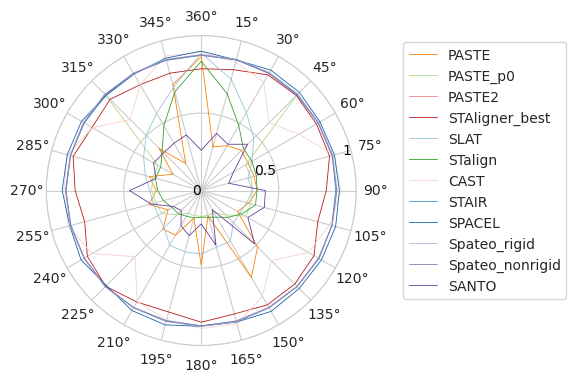

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/SABench/Robustness/DLPFC/DLPFC_rotation.csv')
filtered_columns = [col for col in df.columns if not any(sub in col for sub in ["_CA", "_FG", "_CAFG"])]

df= df[filtered_columns]
angles = np.arange(0, 361, 15)
df = df.iloc[1:]
angles = angles[1:]
angles_radians = np.deg2rad(angles)
angles_radians = np.concatenate((angles_radians, [angles_radians[0]]))

fig, ax = plt.subplots(figsize=(4, 6), subplot_kw=dict(polar=True))
ax.set_theta_zero_location('N')  
ax.set_theta_direction(-1)  

for idx, method in enumerate(df.columns):  
    data = df[method].values
    data = np.concatenate((data, [data[0]])) 
    ax.plot(angles_radians, data, 
            linewidth=0.6, 
            label=method, 
            color=color_dict[method])  

ax.set_xticks(np.deg2rad(np.arange(15, 361, 15)))  
#ax.set_xticklabels([str(int(angle)) for angle in np.arange(15, 361, 15)])
ax.set_xticklabels([f"{int(angle)}°" for angle in np.arange(15, 361, 15)])

y_ticks = [0, 0.5, 1]
ax.set_yticks(y_ticks)
ax.set_yticklabels([])  

for y in y_ticks:
    ax.text(np.deg2rad(75), y, f'{y}', 
            ha='right',  
            va='center',
            color='black',
            fontsize=10
            )  

plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.show()

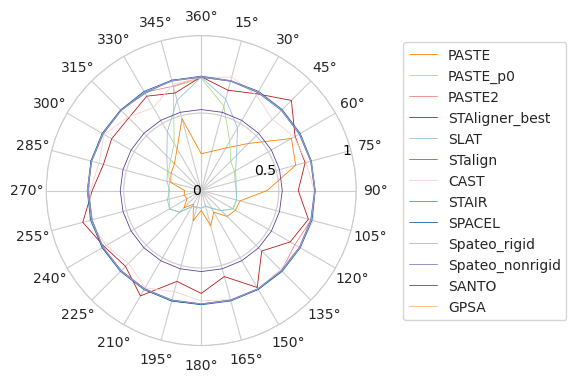

In [24]:
df = pd.read_csv('/SABench/Robustness/MHPR/MHPR_rotation.csv')
methods= pd.Index(['PASTE', 'PASTE_p0', 'PASTE2','STAligner_best',  'SLAT','STalign', 'CAST', 
       'STAIR', 'SPACEL', 'Spateo_rigid', 'Spateo_nonrigid',
       'SANTO','GPSA'],dtype='object')
df = df[methods] 
angles = np.arange(0, 361, 15)
df = df.iloc[1:]
angles = angles[1:]
angles_radians = np.deg2rad(angles)
angles_radians = np.concatenate((angles_radians, [angles_radians[0]]))

fig, ax = plt.subplots(figsize=(4, 6), subplot_kw=dict(polar=True))
ax.set_theta_zero_location('N')  
ax.set_theta_direction(-1) 

for idx, method in enumerate(df.columns):  
    data = df[method].values
    data = np.concatenate((data, [data[0]]))
    ax.plot(angles_radians, data, 
            linewidth=0.6, 
            label=method, 
            color=color_dict[method]) 

ax.set_xticks(np.deg2rad(np.arange(15, 361, 15)))  
#ax.set_xticklabels([str(int(angle)) for angle in np.arange(15, 361, 15)])
ax.set_xticklabels([f"{int(angle)}°" for angle in np.arange(15, 361, 15)])

y_ticks = [0, 0.5, 1]
ax.set_yticks(y_ticks)
ax.set_yticklabels([])  

for y in y_ticks:
    ax.text(np.deg2rad(75), y, f'{y}', 
            ha='right', 
            va='center',
            color='black',
            fontsize=10
            )    

plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.show()

/tmp/ipykernel_51304/4049625696.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(stats_df['Method'], rotation=45, ha='right')


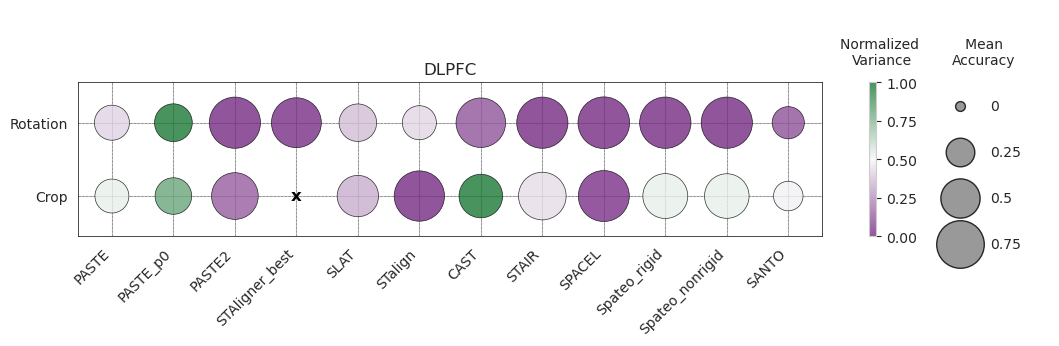

In [25]:
crop_df = pd.read_csv('/SABench/Robustness/DLPFC/DLPFC_crop.csv', header=0)
crop_df= crop_df[[col for col in crop_df.columns if not any(sub in col for sub in ["_CA", "_FG", "_CAFG"])]]
rotation_df = pd.read_csv('/SABench/Robustness/DLPFC/DLPFC_rotation.csv', header=0)
rotation_df= rotation_df[[col for col in rotation_df.columns if not any(sub in col for sub in ["_CA", "_FG", "_CAFG"])]]
methods= crop_df.columns  
rotation_df = rotation_df[methods]  

crop_df = crop_df.apply(pd.to_numeric, errors='coerce')
rotation_df = rotation_df.apply(pd.to_numeric, errors='coerce')

def compute_stats(df):
    mean_vals = df.mean()
    var_vals = df.var()
    all_na = df.isna().all()
    norm_vals = (var_vals - var_vals.min()) / (var_vals.max() - var_vals.min())

    return pd.DataFrame({'Mean': mean_vals, 'Variance': var_vals, 'All_NA': all_na, 'Norm_Variance': norm_vals})

crop_stats = compute_stats(crop_df)
rotation_stats = compute_stats(rotation_df)

crop_stats['Category'] = 'Crop'
rotation_stats['Category'] = 'Rotation'
stats_df = pd.concat([crop_stats, rotation_stats]).reset_index().rename(columns={'index': 'Method'})

fig, ax = plt.subplots(figsize=(12, 2))
sns.set_style("whitegrid")
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.5, zorder=1)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.5, zorder=1)

for x_pos in range(len(stats_df['Method'].unique())):
    ax.axvline(x=x_pos, color='gray', linestyle='--', linewidth=0.5, zorder=1)

from matplotlib.colors import LinearSegmentedColormap
colors = ["#762A83", "#f7f7f7", "#1B7837"]  
cmap = LinearSegmentedColormap.from_list("PurpleGreen", colors)

sc = ax.scatter(stats_df['Method'], stats_df['Category'], 
                s=stats_df['Mean'] * 1500+50,  
                c=stats_df['Norm_Variance'], cmap=cmap, edgecolors="black",linewidth=0.5,alpha=0.8)

for i, row in stats_df.iterrows():
    if row['All_NA']:
        ax.text(row['Method'], row['Category'], 'x', ha='center', va='center', fontsize=12, color='black', fontweight='bold')

cbar = plt.colorbar(sc, ax=ax, ticks=np.arange(0, 1.25, 0.25))

cbar.ax.text(1.7, 1.1, 'Normalized \nVariance', 
            transform=cbar.ax.transAxes,
            ha='center', va='bottom',
            rotation=0)  

ax.set_yticks(ax.get_yticks())  
ax.set_ylim(ax.get_ylim()[0] - 0.5, ax.get_ylim()[1] + 0.5) 
ax.set_xticklabels(stats_df['Method'], rotation=45, ha='right')

legend_sizes = [0,0.25, 0.5, 0.75]
legend_labels = [f"{size}" for size in legend_sizes]
legend_markers = []


for size in legend_sizes:
    legend_markers.append(plt.scatter([], [], s=size*1500+50, color='gray', 
                                    edgecolor='black', alpha=0.8))

size_legend = ax.legend(legend_markers, legend_labels,
                       title="   Mean\nAccuracy",
                       bbox_to_anchor=(1.12, 0.6),  
                       loc='center left',
                       frameon=False,
                       borderpad=2,
                       handletextpad=1.2,  
                       labelspacing=2.3,  
                       scatterpoints=1,
                       fontsize=10,
                       title_fontsize=10
                       )
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.5)

plt.title('DLPFC')
plt.show()

/tmp/ipykernel_51304/2880486255.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(stats_df['Method'], rotation=45, ha='right')


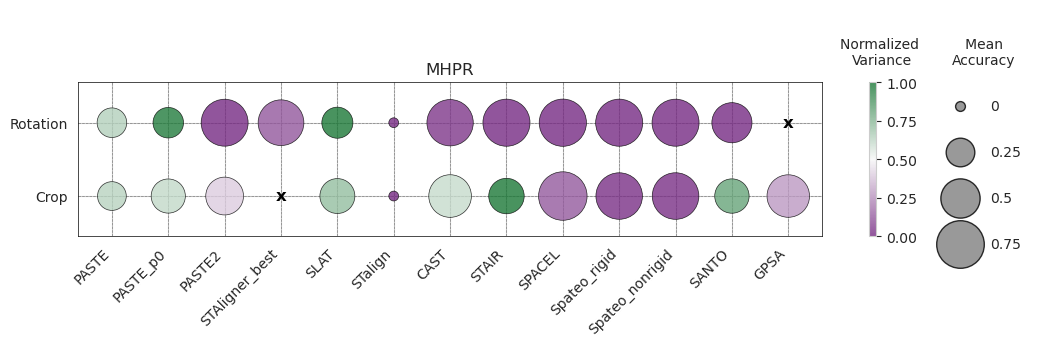

In [26]:
crop_df = pd.read_csv('/SABench/Robustness/MHPR/MHPR_crop.csv', header=0)
crop_df= crop_df[[col for col in crop_df.columns if not any(sub in col for sub in ["_CA", "_FG", "_CAFG"])]]
rotation_df = pd.read_csv('/SABench/Robustness/MHPR/MHPR_rotation.csv', header=0)
rotation_df= rotation_df[[col for col in rotation_df.columns if not any(sub in col for sub in ["_CA", "_FG", "_CAFG"])]]
methods= pd.Index(['PASTE', 'PASTE_p0', 'PASTE2','STAligner_best',  'SLAT','STalign', 'CAST', 
       'STAIR', 'SPACEL', 'Spateo_rigid', 'Spateo_nonrigid',
       'SANTO','GPSA'],dtype='object')
crop_df = crop_df[methods]  
rotation_df = rotation_df[methods] 

crop_df = crop_df.apply(pd.to_numeric, errors='coerce')
rotation_df = rotation_df.apply(pd.to_numeric, errors='coerce')

def compute_stats(df):
    mean_vals = df.mean()
    var_vals = df.var()
    all_na = df.isna().all()
    norm_vals = (var_vals - var_vals.min()) / (var_vals.max() - var_vals.min())

    return pd.DataFrame({'Mean': mean_vals, 'Variance': var_vals, 'All_NA': all_na, 'Norm_Variance': norm_vals})

crop_stats = compute_stats(crop_df)
rotation_stats = compute_stats(rotation_df)

crop_stats['Category'] = 'Crop'
rotation_stats['Category'] = 'Rotation'
stats_df = pd.concat([crop_stats, rotation_stats]).reset_index().rename(columns={'index': 'Method'})

fig, ax = plt.subplots(figsize=(12, 2))
sns.set_style("whitegrid")
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.5, zorder=1)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.5, zorder=1)

for x_pos in range(len(stats_df['Method'].unique())):
    ax.axvline(x=x_pos, color='gray', linestyle='--', linewidth=0.5, zorder=1)

from matplotlib.colors import LinearSegmentedColormap
colors = ["#762A83", "#f7f7f7", "#1B7837"]  
cmap = LinearSegmentedColormap.from_list("PurpleGreen", colors)

sc = ax.scatter(stats_df['Method'], stats_df['Category'], 
                s=stats_df['Mean'] * 1500+50,  
                c=stats_df['Norm_Variance'], cmap=cmap, edgecolors="black", linewidth=0.5,alpha=0.8)

for i, row in stats_df.iterrows():
    if row['All_NA']:
        ax.text(row['Method'], row['Category'], 'x', ha='center', va='center', fontsize=12, color='black', fontweight='bold')

cbar = plt.colorbar(sc, ax=ax, ticks=np.arange(0, 1.25, 0.25))

cbar.ax.text(1.7, 1.1, 'Normalized \nVariance', 
            transform=cbar.ax.transAxes,
            ha='center', va='bottom',
            rotation=0)  

ax.set_yticks(ax.get_yticks())  
ax.set_ylim(ax.get_ylim()[0] - 0.5, ax.get_ylim()[1] + 0.5)  
ax.set_xticklabels(stats_df['Method'], rotation=45, ha='right')

legend_sizes = [0,0.25, 0.5, 0.75]
legend_labels = [f"{size}" for size in legend_sizes]
legend_markers = []

for size in legend_sizes:
    legend_markers.append(plt.scatter([], [], s=size*1500+50, color='gray', 
                                    edgecolor='black', alpha=0.8))

size_legend = ax.legend(legend_markers, legend_labels,
                       title="   Mean\nAccuracy",
                       bbox_to_anchor=(1.12, 0.6),  
                       loc='center left',
                       frameon=False,
                       borderpad=2,
                       handletextpad=1.2, 
                       labelspacing=2.3,  
                       scatterpoints=1,
                       fontsize=10,
                       title_fontsize=10
                       )

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.5)
plt.title('MHPR')
plt.show()